# Linear Regression

In [104]:
# Import of packages
import numpy as np
from scipy import optimize
import sympy as sm

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We're given the following linear equation: 

$$y_i = \beta_0 + \beta_1 x_{1,i}+\beta_2 x_{2,i}+\epsilon $$

Given the information in the exam questions we assume we have access to data of the independent variables $(x_{1,i},x_{2,i})$ and the dependent variabel $(y_i)$ for N individuals, where $i$ indexes individuals. 

The variable $\epsilon_i$, is a mean-zero stochastic shock. 

## Data Generating Process 

In [69]:
def DGP(N):

    # a. independent variables
    x1 = np.random.normal(0,1,size=N)
    x2 = np.random.normal(0,1,size=N)

    # b. errors
    eps = np.random.normal(0,1,size=N)

    extreme = np.random.uniform(0,1,size=N)
    eps[extreme < 0.05] += np.random.normal(-5,1,size=N)[extreme < 0.05]
    eps[extreme > 0.95] += np.random.normal(5,1,size=N)[extreme > 0.95]

    # c. dependent variable
    y = 0.1 + 0.3*x1 + 0.5*x2 + eps
    return x1, x2, y

** Data accessible: **

In [70]:
np.random.seed(2020)
x1,x2,y = DGP(10000)

# Question 1

In [71]:
#Creating the matrix X
a = [1]*10000
X = np.matrix(np.vstack((a,x1,x2)))
print('stacked:\n',X)

stacked:
 [[ 1.          1.          1.         ...  1.          1.
   1.        ]
 [-1.76884571  0.07555227 -1.1306297  ...  0.0370484   1.70892684
   2.06128052]
 [-0.18279442  0.78062368 -1.01220533 ... -1.44286811 -0.10668645
   0.55908184]]


In [72]:
#Transposing and inversing the matrix X according to the beta_hat given
x = X.transpose()
X_mul=X @ x
X_mul_inv=np.linalg.inv(X_mul)
x_mul=X_mul_inv@X
y1=y[:,np.newaxis]

In [110]:
# Estimating the vector of coefficients using OLS 
beta=x_mul@y1
beta0_hat=float(beta[0])
beta1_hat=float(beta[1])
beta2_hat=float(beta[2])
print(f'beta0_hat = {beta0_hat:.3f}, beta1_hat = {beta1_hat:.3f}, beta2_hat = {beta2_hat:.3f}') 

beta0_hat = 0.096, beta1_hat = 0.293, beta2_hat = 0.503


# Question 2

In [75]:
#Predicting the model given the values obtained in Q1 
beta0_predict=[beta0_hat]*10000
x1_predict=beta1_hat*x1
x2_predict=beta2_hat*x2
y_predict = beta0_predict + x1_predict + x2_predict

### Creating the 3D plot

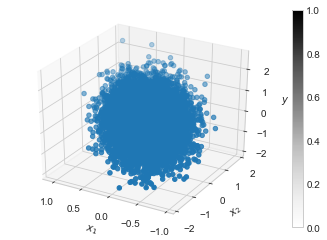

In [76]:
# a. main
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
cs = ax.scatter(x1_predict,x2_predict, y_predict);        

# b. add labels
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')

# c. invert xaxis
ax.invert_xaxis()

# d. colorbar
fig.colorbar(cs);

# Question 3
Estimating the vector of coefficients using Ordinary Least Squares (OLS) using a numerical solver 


In [90]:
#Initially we define the residuals
u=np.empty(len(x1))
def residuals(beta0,beta1,beta2):
    for i in range(len(x1)):
        u[i] = (y1[i] - beta0 - beta1*x1[i] - beta2*x2[i])
    return u

In [109]:
#Defining objective function
def OLS_objective_function(x,beta0,beta1,beta2):
    beta0=x[0]
    beta1=x[1]
    beta2=x[2]
    OLS_sum_squared_errors = np.sum(residuals(beta0,beta1,beta2)**2)
    return OLS_sum_squared_errors

    #Initial guess of betas
    beta_guess= np.array([1,1,1]) 

    #Calling a solver
    res = optimize.minimize(OLS_objective_function,beta_guess,method='Nelder-Mead',args=(beta0,beta1,beta2))

#Printing the results
print(f'beta0 = {res.x[0]:.3f}, beta1 = {res.x[1]:.3f}, beta2 = {res.x[2]:.3f}') 

beta0 = 0.096, beta1 = 0.293, beta2 = 0.503


### Comparing the results from the numerical solver with that of the matrix algebra

Comparing the with the results in Q1 reveals that we down to the fourth decimal obtain the exact same result.  

# Question 4
Estimating the vector of coefficients using Least Absolute Deviations (LAD) using a numerical solver 


In [115]:
#Defining a new objective function
def LAD_objective_function(x,beta0,beta1,beta2):
    beta0=x[0]
    beta1=x[1]
    beta2=x[2]
    LAD_sum_squared_errors = np.sum(np.absolute(residuals(beta0,beta1,beta2)))
    return LAD_sum_squared_errors    

    res = optimize.minimize(LAD_objective_function,beta_guess,method='Nelder-Mead',args=(beta0,beta1,beta2))

print(f'beta0 = {res.x[0]:.3f}, beta1 = {res.x[1]:.3f}, beta2 = {res.x[2]:.3f}') 

beta0 = 0.096, beta1 = 0.293, beta2 = 0.503


# Question 5

### OLS Method
Repeating the estimation using the OLS method 5000 times, drawing a new random sample from the data generating process each time.

In [85]:
#Setting K=5000
beta0_OLS = np.empty(5000)
beta1_OLS = np.empty(5000)
beta2_OLS = np.empty(5000)

#Setting N=50 and K=5000
for i in range(5000):
    x1_Q5,x2_Q5,y_Q5 = DGP(50)
    
    #Defining new residuals
    u_Q5=np.empty(len(x1_Q5))
    def residuals_Q5(beta0_OLS,beta1_OLS,beta2_OLS):
        for i in range(len(x1_Q5)):
            u_Q5[i] = (y_Q5[i] - beta0_OLS - beta1_OLS*x1_Q5[i] - beta2_OLS*x2_Q5[i])
        return u_Q5
    
    #Defining new objective function
    def objective_function_Q5_OLS(x,beta0_OLS,beta1_OLS,beta2_OLS):
        beta0_OLS=x[0]
        beta1_OLS=x[1]
        beta2_OLS=x[2]
        sum_squared_errors_Q5_OLS = np.sum(residuals_Q5(beta0_OLS,beta1_OLS,beta2_OLS)**2)
        return sum_squared_errors_Q5_OLS

    #Initial guess of betas
    beta_guess= np.array([1,1,1]) 

    #Calling a solver 
    res = optimize.minimize(objective_function_Q5_OLS,beta_guess,method='Nelder-Mead',args=(beta0_OLS,beta1_OLS,beta2_OLS))
    beta0_OLS[i-1]=res.x[0]
    beta1_OLS[i-1]=res.x[1]
    beta2_OLS[i-1]=res.x[2]

#Printing the results
print(res.x[0])
print(res.x[1])
print(res.x[2])

0.09337370767056422
0.17034410440753273
0.5090357574414268


### LAD Method
Repeating the estimation using the LAD method 5000 times, drawing a new random sample from the data generating process each time.

In [86]:
#Setting K=5000
beta0_LAD = np.empty(5000)
beta1_LAD = np.empty(5000)
beta2_LAD = np.empty(5000)

#Setting N=50 and K=5000
for i in range(5000):
    x1_new,x2_new,y_new = DGP(50)
    
    #Defining new residuals
    u_Q5=np.empty(len(x1_Q5))
    def residuals_Q5(beta0_LAD,beta1_LAD,beta2_LAD):
        for i in range(len(x1_Q5)):
            u_Q5[i] = (y_Q5[i] - beta0_LAD - beta1_LAD*x1_Q5[i] - beta2_LAD*x2_Q5[i])
        return u_Q5
   
    #Defining new objective function
    def objective_function_Q5(x,beta0_LAD,beta1_LAD,beta2_LAD):
        beta0_LAD=x[0]
        beta1_LAD=x[1]
        beta2_LAD=x[2]
        sum_squared_errors_Q5_LAD = np.sum(np.abs(residuals_new(beta0_LAD,beta1_LAD,beta2_LAD)))
        return sum_squared_errors_Q5_LAD

    #Calling a solver 
    res = optimize.minimize(objective_function_Q5,beta_guess,method='Nelder-Mead',args=(beta0_LAD,beta1_LAD,beta2_LAD))
    beta0_LAD[i-1]=res.x[0]
    beta1_LAD[i-1]=res.x[1]
    beta2_LAD[i-1]=res.x[2]

#Printing the results
print(res.x[0])
print(res.x[1])
print(res.x[2])

0.30786694938478154
0.530540782408675
0.16815275890772696


### Comparing the estimates from the OLS and LAD methods using histograms

** Histogram for $\beta_0$ **

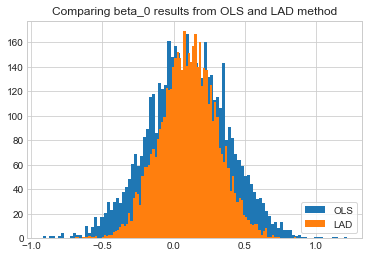

In [87]:
fig1 = plt.figure()
ax = fig1.add_subplot(1,1,1)

ax.hist(beta0_OLS,bins=100,label='OLS')
ax.hist(beta0_LAD,bins=100,label='LAD')

ax.legend(loc='lower right',facecolor='white',frameon=True)
ax.set_title('Comparing beta_0 results from OLS and LAD method');

** Histogram for $\beta_1$ **

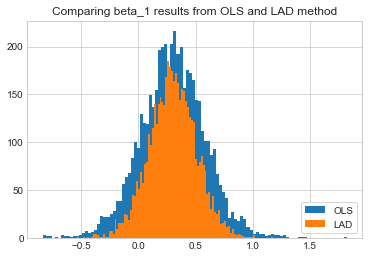

In [88]:
fig2 = plt.figure()
ax = fig2.add_subplot(1,1,1)

ax.hist(beta1_OLS,bins=100,label='OLS')
ax.hist(beta1_LAD,bins=100,label='LAD')

ax.legend(loc='lower right',facecolor='white',frameon=True)
ax.set_title('Comparing beta_1 results from OLS and LAD method');

** Histogram for $\beta_2$ **

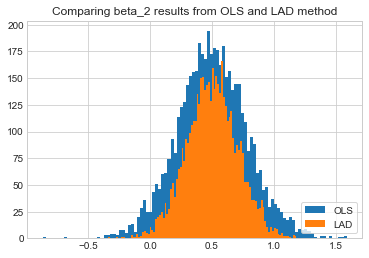

In [89]:
fig3 = plt.figure()
ax = fig3.add_subplot(1,1,1)

ax.hist(beta2_OLS,bins=100,label='OLS')
ax.hist(beta2_LAD,bins=100,label='LAD')

ax.legend(loc='lower right',facecolor='white',frameon=True)
ax.set_title('Comparing beta_2 results from OLS and LAD method');

### Preferred method
We prefer the LAD method to the OLS method, as it gives a smaller variance. This is evident from the first two graphs, as the LAD and OLS histograms have roughly the same height. That means that the there's a large amount of the data around the true paramter value, $\hat{\beta}$. However, the LAD model has a smaller variance, evident from the slimmer widths in the plots, meaning that our estimates are close to the true parameter values of the betas. This is what drives our conclusion that the LAD model is preferred. 

However, we note that in the 3rd historgram, plotting the $\beta_2$ values, the OLS histogram exhibits a significantly higher curve than the OLS. Thus, one could argue that the conclusion is more ambiguous. 

# Conclusion